# Python Decision Tree Algorithm
> Python implementaion of the Decision Tree Algorithm

- toc: true
- branch: master
- badges: true
- comments: true
- author: Ioannis Polymenis
- image: images/decision-trees.png
- categories: [machine-learning, jupyter]



# What is a decision tree


# Classification tasks using Decision Trees

# The dataset 

# The Algorithm breakdown

- The Gini Index
- The Split 
- Building the tree
- Generate Predictions
- Apply to the case study

# The Gini Index
The Gini Index, aslo reffered as the Gini Impurity, is calculated by subtracting the sumation of the probabilities of each class in the dataset  

$$Gini = \sum_{i=1}^{C} (p_i) * (1 - p_i)$$

Where $p$ is the probability of each class $C$

Gini index can be discribed as the **cost function** of the Classification and Regression Trees (CART) at the split node. The Gini Index estimates how good a split is by taking into account how mixed the classes are at the split node. Gini score of $0$ results to a perfect separation where a Gini score of $50/50$ results in an equal distribution of $0.5$ for each class.

#### Gini Example
Supose we have 2 classes of data with 2 rows in class. For a perfect split of $0$ we need the data inth first or the second row to belong either in the first or the secind class.  
First we need to calculate the ratio between the classes in each group.

`ratio = mumber_of(class) / number_of(rows)`

So the Gini Index will be:

```python
gini_index = sum(ratio * (1 - ratio))
```

For the Gini Index (GI) to have correct output need to introduce the size of each group relave to the entire samples in the _parent node_

So, the GI will be:

```python
gini_index = sum(ratio * (1 - ratio)) * (size_of_group/total_samples)
```

In [1]:
#collapse-hide
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

In [2]:
#collapse_show

def gini_index(groups, classes):
    # count the samples at split node
    n_instances = float(sum([len(group) for group in groups]))

    gini = 0.0
    for group in groups:
        size = float(len(group))
        # prevent zero division
        if size == 0:
            continue
        score = 0.0
        
        # group score based on the score of each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # apply the formula
        gini += (1.0 - score) * (size / n_instances)

    return gini

In [3]:
#collapse_hide
# test the gini function

groups1 = [
    [[1, 1], [1, 0]],
    [[1, 1], [1, 0]]
    ]

groups2 = [
    [[1, 0], [1, 0]],
    [[1, 1], [1, 1]]
    ]

classes = [0,1]

In [4]:
#collapse-output
print(gini_index(groups1, classes))
print(gini_index(groups2, classes))

0.5
0.0


#### Create the splite node and the dataset
The split node is composed by a value and an attribute in the dataset

Splitting the dataset means to 
- loop over the rows in the dataset 
- check if the attributes are below or above the split value
- append the values to the left or the right group

In [5]:
#collapse-show

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [6]:
#collapse-show
# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [7]:
#collapse-hide
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1],
	[6.642287351,3.319983761,1]]
	
dataset[7][1]

0.476683375

In [8]:
#collapse-hide

x1, x2, y = list(), list(), list()

for x_val1, x_val2, y_val in dataset:
    x1.append(x_val1)
    x2.append(x_val2)
    y.append(y_val)

print(x1)
print("==================")
print(x2)
print("==================")
print(y)

[2.771244718, 1.728571309, 3.678319846, 3.961043357, 2.999208922, 7.497545867, 9.00220326, 7.444542326, 10.12493903, 6.642287351, 6.642287351]
[1.784783929, 1.169761413, 2.81281357, 2.61995032, 2.209014212, 3.162953546, 3.339047188, 0.476683375, 3.234550982, 3.319983761, 3.319983761]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


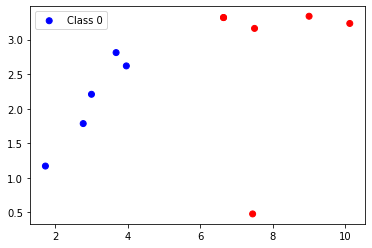

In [9]:

colors = {0:'blue', 1:'red'}
color_ls = [colors[i] for i in y]

with plt.ion():

    plt.scatter(x1, x2, c=color_ls)
    plt.legend(['Class 0', 'Class 1'])
    plt.axis()
    plt.show()

In [10]:
class_values = list(set(row[-1] for row in dataset))
class_values

[0, 1]

In [11]:
split = get_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

Split: [X1 < 6.642]


#### Create the Tree

To build the tree involves the following steps
- Need to have terminal nodes
- Have Recursive splitting
- and finally build the tree

In [12]:
def terminal_node(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [13]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = terminal_node(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = terminal_node(left), terminal_node(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = terminal_node(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = terminal_node(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

In [14]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

In [15]:
# Print a decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

In [16]:
tree = build_tree(dataset, 1, 1)
tree

{'index': 0, 'value': 6.642287351, 'left': 0, 'right': 1}